# SPARC-4 products
***

This notebook shows an example for viewing and accessing the SPARC4 data products.

* Eder Martioli, LNA 18 Apr 2024

In [1]:
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sparc4.product_plots as s4plt
import sparc4.pipeline_lib as s4pipelib

### Set paths to example files 
Below we set the paths to example files, which are sparc4-pipeline products obtained from the reduction of data in the [minidata package](https://drive.google.com/file/d/1tAVjyhYGMDcrU5sDdGCmd_f5HoazZ294/view?usp=drive_link).

In [2]:
db_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250227/sparc4acs3/20250227_sparc4acs3_db.csv'

phot_lightcurve_example ='/media/fernando/KINGSTON/Doutorado/2025/reduced/20250227/sparc4acs3/20250227_s4c3_v1025cen_POLAR_L4_S+N_lc.fits'

polar_stack_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250227/sparc4acs3/20250227_s4c3_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_stack.fits'

polar_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250227/sparc4acs3/20250227_s4c3_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits'

polar_time_series_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250227/sparc4acs3/20250227_s4c3_v1025cen_POLAR_L4_ts.fits'

# DB product example
***
In this simple example, we just read the database created by the `sparc4-pipelin` and print it as a pandas table. It's an easy way to quickly access the log of observations.

In [3]:
db = ascii.read(db_example)
pd.DataFrame(np.array(db))

,FILE,DATE-OBS,EXPTIME,RA,DEC,OBJECT,OBSTYPE,INSTMODE,CHANNEL,VBIN,...,VCLKAMP,CCDSERN,PREAMP,READRATE,EMMODE,EMGAIN,WPPOS,WPSEL,CALW,ASEL
0,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-27T21:23:49.048000,0.00001,0,0,ZERO,ZERO,PHOT,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,0,None,None,False
1,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-27T21:23:50.168073,0.00001,0,0,ZERO,ZERO,PHOT,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,0,None,None,False
2,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-27T21:23:51.288146,0.00001,0,0,ZERO,ZERO,PHOT,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,0,None,None,False
3,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-27T21:23:52.408218,0.00001,0,0,ZERO,ZERO,PHOT,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,0,None,None,False
4,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-27T21:23:53.528291,0.00001,0,0,ZERO,ZERO,PHOT,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,0,None,None,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-28T07:55:22.490000,100.00000,12:38:16.18,-38:42:45.60,V1025 Cen,OBJECT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,14,L4,None,True
2499,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-28T07:57:04.894000,100.00000,12:38:16.18,-38:42:45.60,V1025 Cen,OBJECT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,15,L4,None,True
2500,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-28T07:58:47.600000,100.00000,12:38:16.18,-38:42:45.60,V1025 Cen,OBJECT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,16,L4,None,True
2501,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-28T08:00:30.381000,100.00000,12:38:16.18,-38:42:45.60,V1025 Cen,OBJECT,POLAR,3,1,...,Normal,9916,Gain 2,1.0,Conventional,2,1,L4,None,True


# POLAR products example
***
In this example we show how to work with the polarimetric products of SPARC4

We start by reading the science image FITS file and showing its information. 

In [4]:
hdul = fits.open(polar_stack_example)
hdul.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250227/sparc4acs3/20250227_s4c3_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_stack.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     169   (1024, 1024)   float64   
  1  CATALOG_POL_S_AP005    1 TableHDU        51   109R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  2  CATALOG_POL_N_AP005    1 TableHDU        51   109R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  3  CATALOG_POL_S_AP008    1 TableHDU        51   109R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  4  CATALOG_POL_N_AP008    1 TableHDU        51   109R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  5  CATALOG_POL_S_AP010    1 TableHDU        51   109R x 13C   [I11, D2

Then we plot the science frame using the `sparc4.product_plots` library

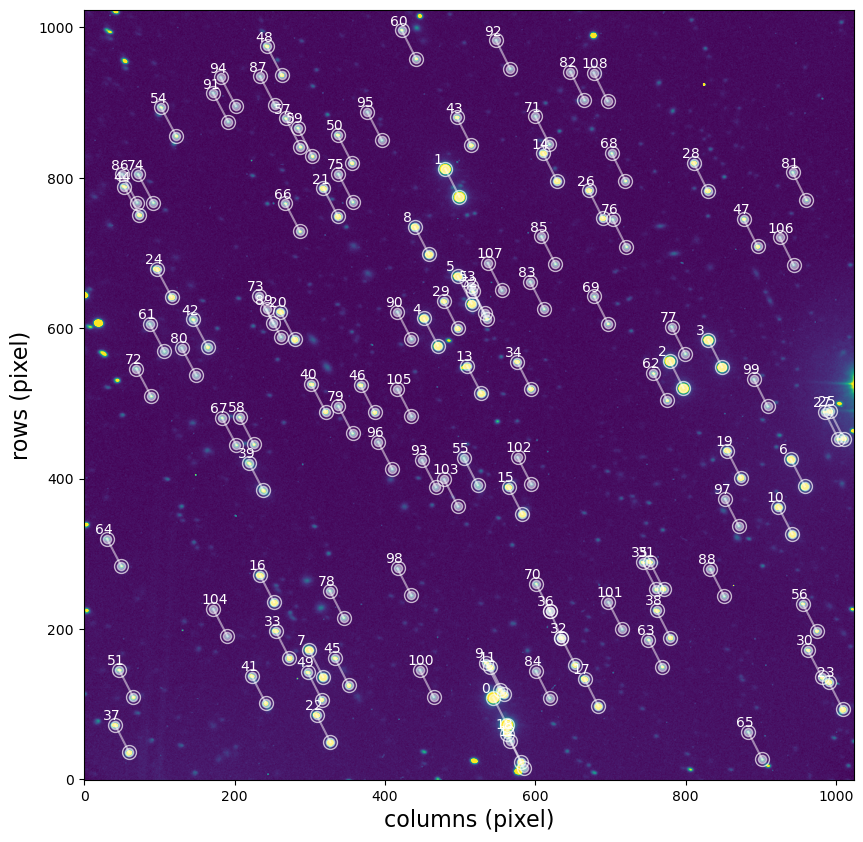

In [5]:
s4plt.plot_sci_polar_frame(polar_stack_example)

Now print one of the catalogs to see its contents

In [6]:
catalog = 'CATALOG_POL_N_AP010'
pd.DataFrame(hdul[catalog].data)

,SRCINDEX,RA,DEC,X,Y,FWHMX,FWHMY,MAG,EMAG,SKYMAG,ESKYMAG,APER,FLAG
0,0,189.553339,-38.759696,562.402720,72.612138,4.934678,4.934678,-10.816604,0.000815,-8.802568,0.000773,10,0
1,1,189.564857,-38.693772,499.072666,774.896743,4.628438,4.628438,-10.381771,0.001029,-8.785456,0.000694,10,0
2,2,189.527272,-38.716393,797.044551,520.204969,4.641070,4.641070,-10.115383,0.001208,-8.789783,0.000857,10,0
3,3,189.521201,-38.713504,848.344244,548.133396,4.614016,4.614016,-9.767083,0.001487,-8.792623,0.000819,10,0
4,4,189.567234,-38.712649,470.512845,576.692706,4.639887,4.639887,-9.121946,0.002237,-8.784385,0.000713,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,104,189.599154,-38.750422,190.558130,190.274319,4.879064,4.879064,-4.870462,0.077840,-8.793121,0.000682,10,0
105,105,189.571005,-38.721682,435.242796,482.816733,4.553479,4.553479,-4.756282,0.085661,-8.783868,0.000656,10,0
106,106,189.510416,-38.700173,943.372367,684.267259,4.284420,4.284420,-4.668830,0.092632,-8.784721,0.000643,10,0
107,107,189.557325,-38.705291,555.403271,650.191200,4.448005,4.448005,-4.586553,0.100302,-8.784884,0.000672,10,0


Below we select the source with index number 3 assigned as the main target to be analyzed. Then we select three other stars with indices 0, 1, and 2, as comparisons for differential photometry. All indices are displayed in the image above.  

After selecting the stars we use the function `s4plt.plot_light_curve` to produce plots of the lightcurve data.

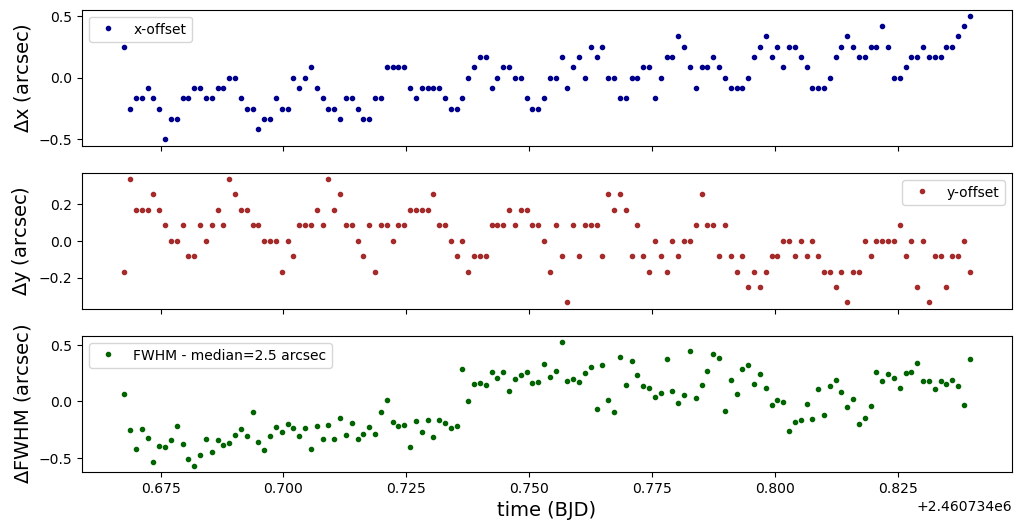

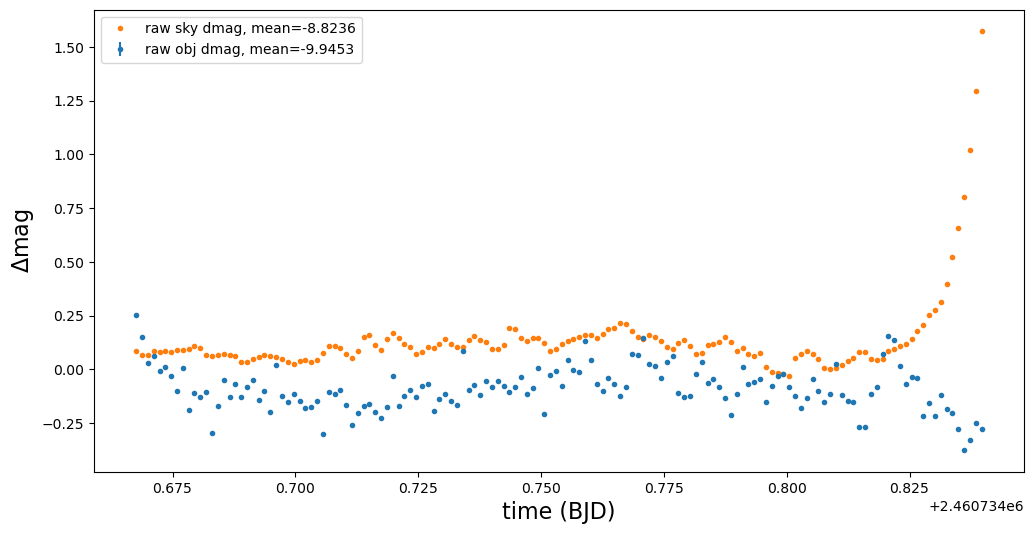

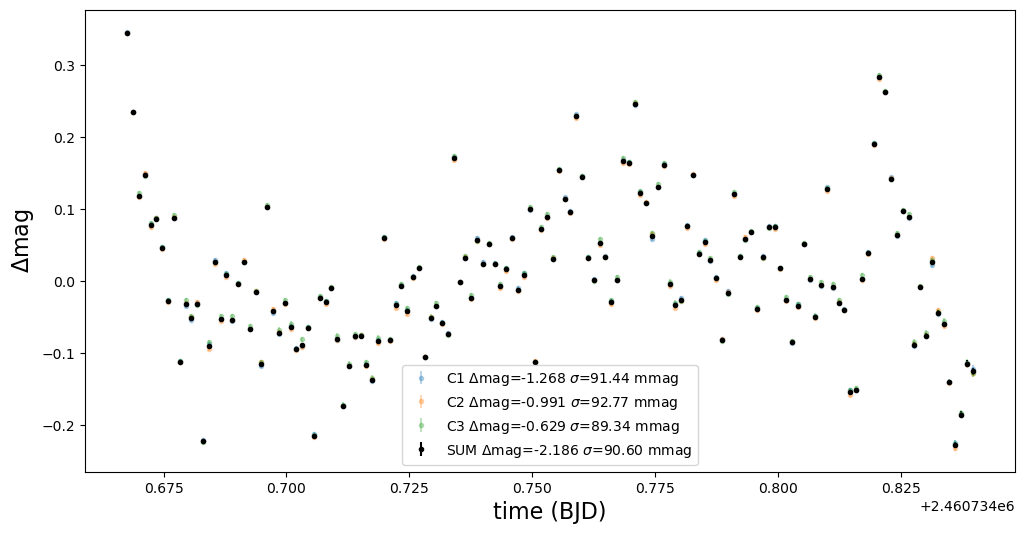

       TIME                x         ...       diffmagsum     
------------------ ----------------- ... ---------------------
2460734.6675975984 461.1915162034555 ...   0.34401776024873776
 2460734.668785011 459.6915162034555 ...    0.2338589779009812
  2460734.66997225 459.9415162034555 ...   0.11799911559451814
 2460734.671157544 459.9415162034555 ...   0.14745997733513327
2460734.6723478385 460.1915162034555 ...   0.07753894522558014
  2460734.67353311 459.9415162034555 ...   0.08677279347963385
2460734.6747204177 459.6915162034555 ...    0.0462543079519282
               ...               ... ...                   ...
2460734.8325567935 460.9415162034555 ...   -0.0437235160989804
 2460734.833742052 460.9415162034555 ... -0.059466345244725716
2460734.8349296823 461.1915162034555 ...   -0.1403197420094262
2460734.8361149873 461.1915162034555 ...   -0.2270682920579219
 2460734.837303787 461.4415162034555 ...   -0.1849050566345607
 2460734.838493455 461.6915162034555 ...  -0.1144823984

In [7]:
catalog = 'CATALOG_PHOT_AP010'
target=4
comps=[1,2,3]

lc = s4plt.plot_light_curve(phot_lightcurve_example, target=target, comps=comps, nsig=10,
                            plot_coords=True, plot_rawmags=True, plot_sum=True,
                            plot_comps=True, catalog_name=catalog)

print(lc)

Now we open a polarimetry FITS product and print its basic information

In [8]:
polar = fits.open(polar_example)
polar.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250227/sparc4acs3/20250227_s4c3_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     903   ()      
  1  POLARIMETRY_AP005    1 BinTableHDU   1250   109R x 619C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D,

Below we print one of the catalog extensions

In [9]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data)

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

Then we can print all column names to check the data available in each catalog

In [10]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data).columns

Index(['APERINDEX', 'APER', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2',
       'FWHM',
       ...
       'FE0143', 'EFE0143', 'FO0144', 'EFO0144', 'FE0144', 'EFE0144', 'FO0145',
       'EFO0145', 'FE0145', 'EFE0145'],
      dtype='object', length=619)

Finally, we can select the source of interest (in this case index=0) and then we get the polarimetry results using the function `get_polarimetry_results` from `sparc4.pipeline_lib` library:

2025-09-18 00:44:33,762 astropop - INFO - Normalization disabled.  [__init__]


2025-09-18 00:44:33,762 | INFO | Normalization disabled.


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/_deriv.py:29: RuntimeWarning: invalid value encountered in log
  return np.log(x)*np.power(x, y)
2025-09-18 00:44:33,774 root - INFO - Source index: i=4   [pipeline_lib]


2025-09-18 00:44:33,774 | INFO | Source index: i=4 


2025-09-18 00:44:33,775 root - INFO - Source RA=189.56723406665265 Dec=-38.71264913026825 mag=-15.4063+-0.0003  [pipeline_lib]


2025-09-18 00:44:33,775 | INFO | Source RA=189.56723406665265 Dec=-38.71264913026825 mag=-15.4063+-0.0003


2025-09-18 00:44:33,776 root - INFO - Best aperture radius: 15.0 pixels  [pipeline_lib]


2025-09-18 00:44:33,776 | INFO | Best aperture radius: 15.0 pixels


2025-09-18 00:44:33,777 root - INFO - Polarization in Q: -0.0021+-0.0005  [pipeline_lib]


2025-09-18 00:44:33,777 | INFO | Polarization in Q: -0.0021+-0.0005


2025-09-18 00:44:33,778 root - INFO - Polarization in U: -0.0010+-0.0008  [pipeline_lib]


2025-09-18 00:44:33,778 | INFO | Polarization in U: -0.0010+-0.0008


2025-09-18 00:44:33,778 root - INFO - Polarization in V: -0.0000+-0.0004  [pipeline_lib]


2025-09-18 00:44:33,778 | INFO | Polarization in V: -0.0000+-0.0004


2025-09-18 00:44:33,779 root - INFO - Total linear polarization p: 0.0023+-0.0006  [pipeline_lib]


2025-09-18 00:44:33,779 | INFO | Total linear polarization p: 0.0023+-0.0006


2025-09-18 00:44:33,780 root - INFO - Angle of polarization theta: 102+-7 deg  [pipeline_lib]


2025-09-18 00:44:33,780 | INFO | Angle of polarization theta: 102+-7 deg


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: divide by zero encountered in log10
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: invalid value encountered in cast
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: overflow encountered in scalar negative
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
2025-09-18 00:44:33,781 root - INFO - Free constant k: 0.8288609014990335+-0.0  [pipeline_lib]


2025-09-18 00:44:33,781 | INFO | Free constant k: 0.8288609014990335+-0.0


2025-09-18 00:44:33,782 root - INFO - Zero of polarization: 27.2+-0.0  [pipeline_lib]


2025-09-18 00:44:33,782 | INFO | Zero of polarization: 27.2+-0.0


2025-09-18 00:44:33,783 root - INFO - RMS of zi residuals: 0.0034904227209487924  [pipeline_lib]


2025-09-18 00:44:33,783 | INFO | RMS of zi residuals: 0.0034904227209487924


2025-09-18 00:44:33,783 root - INFO - Reduced chi-square (n=146.0, DOF=143.0): 1.19  [pipeline_lib]


2025-09-18 00:44:33,783 | INFO | Reduced chi-square (n=146.0, DOF=143.0): 1.19


/home/fernando/anaconda3/lib/python3.12/site-packages/numpy/core/numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
2025-09-18 00:44:33,868 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:44:33,868 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 00:44:33,873 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:44:33,873 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 00:44:34,100 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:44:34,100 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 00:44:34,105 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:44:34,105 | INFO | Substituting symbol \perp from STIXGeneral


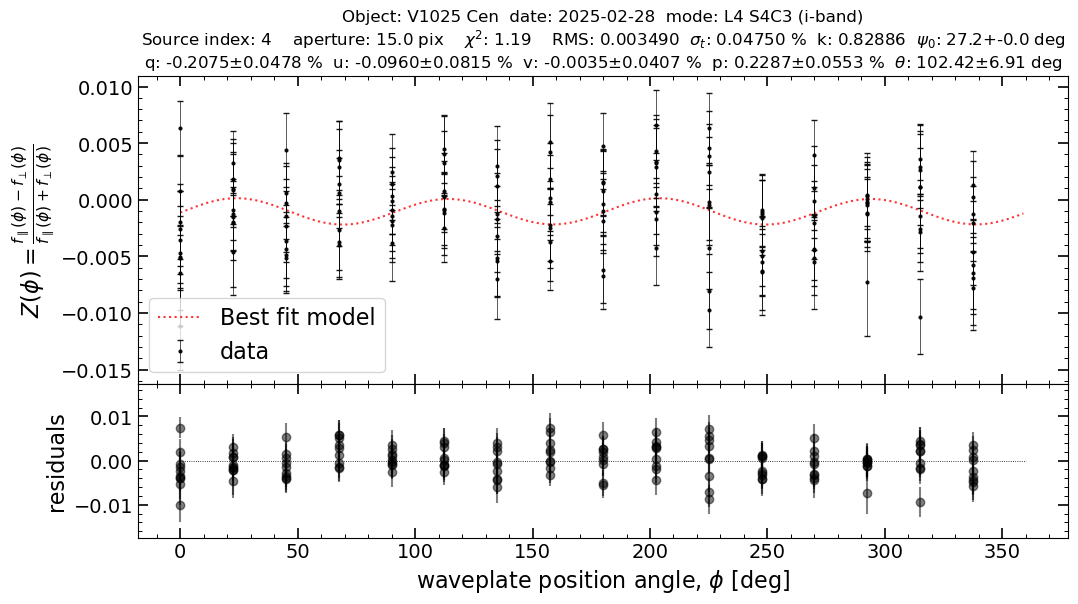

In [11]:
source_index = 4

pol_results = s4pipelib.get_polarimetry_results(polar_example,
                                                source_index=source_index,
                                                min_aperture=5,
                                                max_aperture=21,
                                                plot=True,
                                                verbose=True)

Below we print all variables names for the measurements available in the polar product

In [12]:
for key in pol_results.keys():
    print(key, ":", pol_results[key])

POLAR_PRODUCT : /media/fernando/KINGSTON/Doutorado/2025/reduced/20250227/sparc4acs3/20250227_s4c3_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits
SOURCE_INDEX : 4
POLARIMETRY_SUCCESS : True
APERTURE_INDEX : 5
APERTURE_RADIUS : 15.0
NEXPS : 146
MAG : -15.4063+-0.0003
RA : 189.56723406665265
DEC : -38.71264913026825
FWHM : 5.193204000813604
X1 : 451.8701875587621
Y1 : 613.0394840775735
X2 : 470.51284484814886
Y2 : 576.6927064023155
WAVEPLATE_ANGLES : [  0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5 270.  292.5 315.  337.5   0.   22.5  45.   67.5
  90.  112.5 135.  157.5 180.  202.5 225.  247.5 270.  292.5 315.  337.5
   0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5 270.  292.5 315.  337.5   0.   22.5  45.   67.5
  90.  112.5 135.  157.5 180. 

And below we show a simple example how to get one of these measurements out. For instance, we're getting the total polarization and the polarization angle. 

In [13]:
p = pol_results["P"]*100
pa = pol_results["THETA"]
print("Polarization: {} %  Angle of polarization: {} deg".format(p,pa) )

Polarization: 0.23+-0.06 %  Angle of polarization: 102+-7 deg deg


Finally, we show below an example of a polarimetric time series product. 

In [14]:
polar_ts = fits.open(polar_time_series_example)
pd.DataFrame(polar_ts[1].data)

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

In [15]:
pd.DataFrame(polar_ts[1].data).columns

Index(['TIME', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2', 'FWHM', 'MAG',
       'EMAG', 'Q', 'EQ', 'U', 'EU', 'V', 'EV', 'P', 'EP', 'THETA', 'ETHETA',
       'K', 'EK', 'ZERO', 'EZERO', 'NOBS', 'NPAR', 'CHI2', 'RMS', 'TSIGMA'],
      dtype='object')

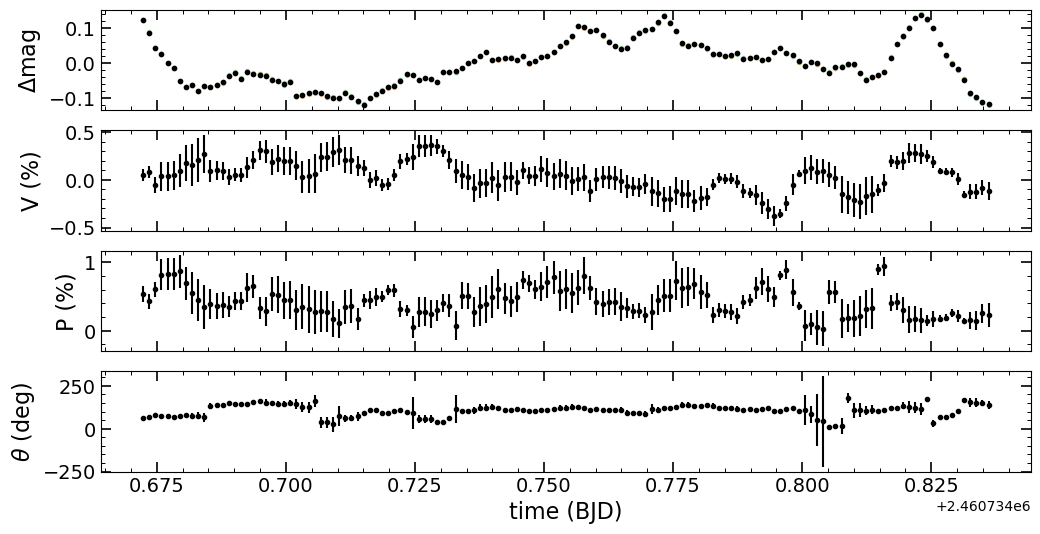

diffmag_C00000,diffmag_err_C00000,diffmag_C00001,diffmag_err_C00001,diffmag_C00002,diffmag_err_C00002,TIME,x1,y1,x2,y2,fwhm,mag,mag_err,magsum,magsum_err,diffmagsum,polarization_1,polarization_1_err,polarization_2,polarization_2_err
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.12202157580859563,0.0008436273499527814,0.12195786926406349,0.0008775145198924641,0.12184149509536546,0.0009432135820125844,2460734.6723303534,451.8701875587621,613.0394840775735,470.51284484814886,576.6927064023155,4.46529923063468,-12.35416710462629,0.0007802323272039006,-14.40704285488534,0.0007383110768919975,0.12212363554899675,0.005327303947507145,0.0011407108654707167,65.43683501484375,6.123985241677209
0.08689388444769364,0.0008634237555206937,0.087060789759839,0.0008961188731823605,0.08742232666161698,0.0009605996420558476,2460734.673517019,450.3701875587621,614.5394840775735,469.01284484814886,578.1927064023155,4.45431873744835,-12.320769769229123,0.0008015720600354708,-14.408527822070665,0.0007373791334858748,0.08724133296650471,0.004266286510875828,0.0010597600000199793,67.24481937724502,7.104336739528831
0.04426579727063462,0.0008901706986855939,0.044174244307711774,0.0009216707535460801,0.044699305616154206,0.000984884624112691,2460734.6747052763,450.6201875587621,614.0394840775735,469.26284484814886,577.6927064023155,4.45431873744835,-12.279104213969303,0.0008302798571878065,-14.409598971417326,0.0007374175545773109,0.044504628360023446,0.006061092570071143,0.0011071089740400098,79.66352073740124,5.224027894557074
0.025235776645414987,0.0009030579369696997,0.025958747339265287,0.0009341588851838562,0.026115319217897337,0.0009965328852947662,2460734.6758905705,450.6201875587621,614.0394840775735,469.26284484814886,577.6927064023155,4.470157505409811,-12.261544347506725,0.0008440495603017276,-14.410691915955546,0.0007375535716334157,0.025851817359225038,0.008155180274648517,0.0022541479530175683,71.92112670817112,7.905236829247285
-0.0004889208317813143,0.0009183913888870217,0.0005428775612994485,0.0009487751889778803,0.0013934503654535746,0.0010105256564273534,2460734.677080709,450.8701875587621,614.0394840775735,469.51284484814886,577.6927064023155,4.398245553234307,-12.237505256155332,0.0008604833174542837,-14.412036220114508,0.0007372140705713574,0.000468421848870193,0.008256546312677573,0.0023339789022126887,71.98946517823016,8.084711703341187
-0.014370930058083431,0.0009269870941096205,-0.012783120860380137,0.0009570167116585984,-0.012988689653663954,0.0010177263347494253,2460734.678267167,450.6201875587621,614.2894840775735,469.26284484814886,577.9427064023155,4.325684656604101,-12.224670096066937,0.0008697476356771753,-14.413017061210102,0.0007359144666223275,-0.013347579335118098,0.008279629017783386,0.0023788369419887483,70.92288902473311,8.217123785951028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-0.003514224660866816,0.0010217834720589165,0.0,0.0010565242856968228,-3.9535152929204287e-07,0.0011260350009678934,2460734.8289827993,451.1201875587621,613.5394840775735,469.76284484814886,577.1927064023155,5.594533309589105,-12.175770993556105,0.0009605292372580112,-14.352113845074634,0.0008126442066257222,-0.0013434657104820502,0.002637657486395321,0.0005897615299623059,80.70341011186174,6.394757410285668
-0.01873268226699487,0.0010527423236525383,-0.01566335049174583,0.001087833000303615,-0.015233536454347885,0.0011579326817061548,2460734.8301677858,451.1201875587621,613.7894840775735,469.76284484814886,577.4427064023155,5.5858894558181005,-12.15906554914137,0.000991754957601987,-14.350778231808928,0.0008256642441923721,-0.016713296859510507,0.0021547175520840924,0.0009196368749676988,105.29139201804144,12.206525443966733


In [17]:
s4plt.plot_polar_time_series(polar_time_series_example, 
                             target=4, 
                             comps=[1,2,3], 
                             plot_total_polarization=True, 
                             plot_polarization_angle=True)